In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('data.xlsx')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

check the number of unique values in target variables

In [12]:
df['target'].nunique()

2

View the unique value in target variable


In [13]:
df['target'].unique()

array([1, 0], dtype=int64)


unique values are 0 and 1, 1 denotes the presence of heart disease, 0 denotes the absence of heart disease.


# frequency distribution of target variables

In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 denotes the presence of heart disease, 165 patients suffer from heart disease
0 denotes the absence of heart disease, 138 patients doest not suffer from heart disease.

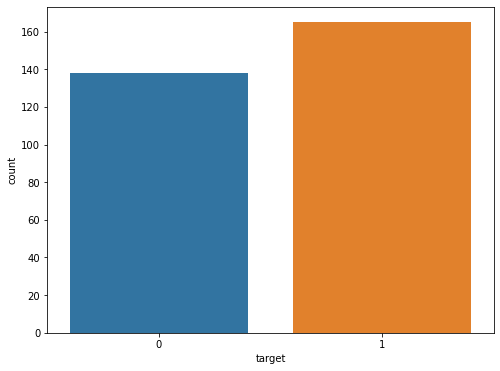

In [15]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="target",data=df)
plt.show()

 frequency distribution of target variable wrt sex

In [28]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

we can see that out of 96 females 72 have heart disease and 24 do not have heart disease.
we can see that out of 207 males, 114 do not have heart disease and 93 had heart disease.

In [29]:
##we can visualize the same.

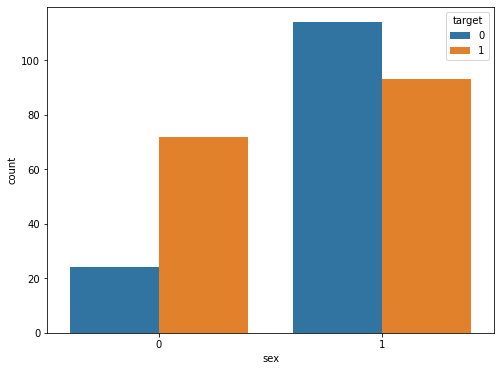

In [16]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target',data=df)
plt.show()

We can follow the same principles and visualize the target values distribution wrt fbs (fasting blood sugar) and exang (exercise induced angina)

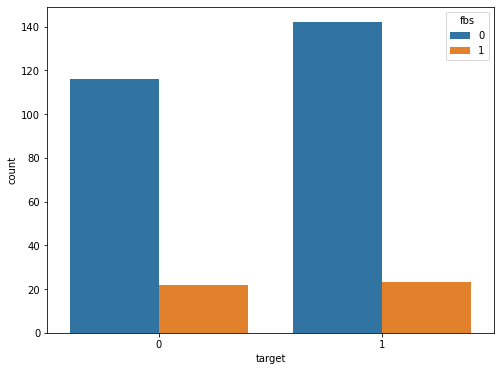

In [17]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)
plt.show()



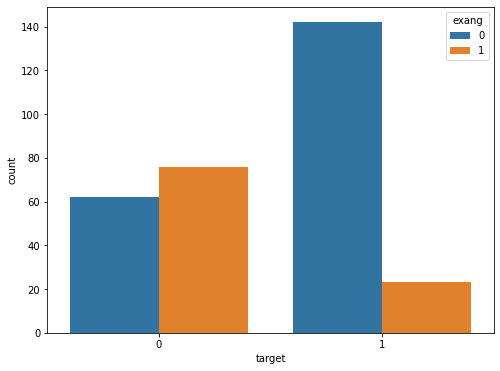

In [18]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='exang',data=df)
plt.show()


Estimate correlations coefficient

In [19]:
correlation =df.corr()

The target variable is target. So, we should check how each attribute correlates with the target variable. 
We can do it as follows:-

In [20]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.

We can see that the cp and thalach variables are mildly positively correlated with target variable. So, I will analyze the interaction between these features and target variable.

Analysis of target and cp variable

first checking the unique value

In [21]:
df['cp'].nunique()

4

In [22]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

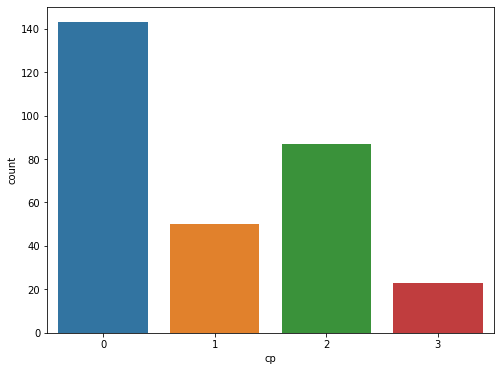

In [23]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df)
plt.show()

Frequency distribution of target variable wrt cp.

In [24]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

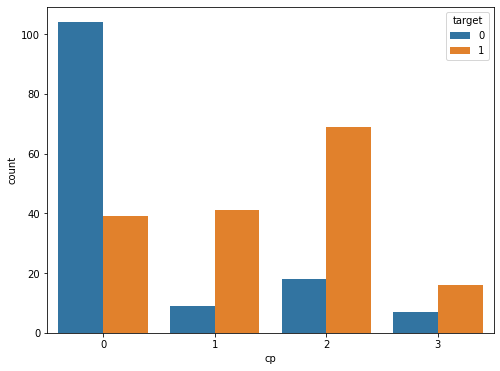

In [25]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',hue='target',data=df)
plt.show()

Analysis of target and thalach variable

In [27]:
df['thalach'].nunique()

91

Histogram for thalach

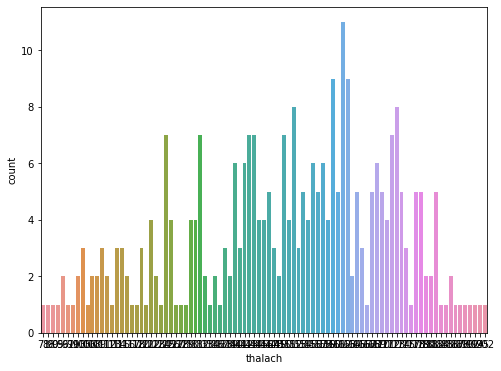

In [28]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='thalach',data=df)
plt.show()

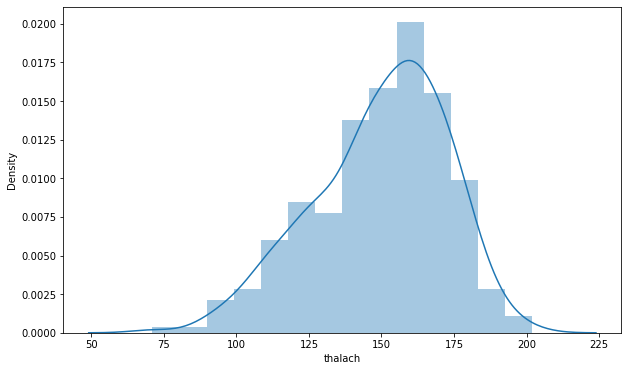

In [29]:
f,ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x)
plt.show()

It can be seen that it is slightly negatively skewed. that means it has relation with the target, lets find it out with the 
help of boxplot.

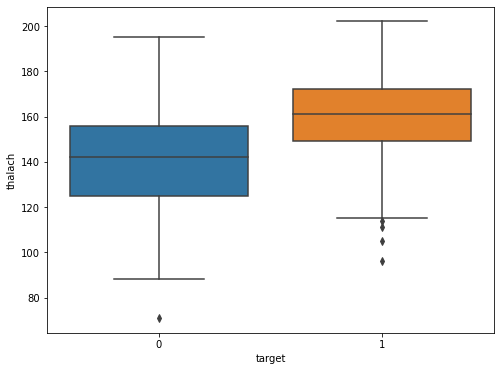

In [30]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(y='thalach',x='target',data=df)
plt.show()

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate
(thalach) as compared to people who are not suffering from heart disease (target = 0).


An important step in EDA is to discover patterns and relationships between variables in the dataset.

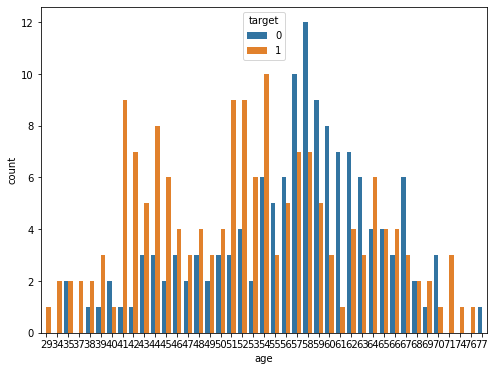

In [32]:
###•	Study the occurrence of CVD across different ages
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='age',hue='target',data=df)
plt.show()

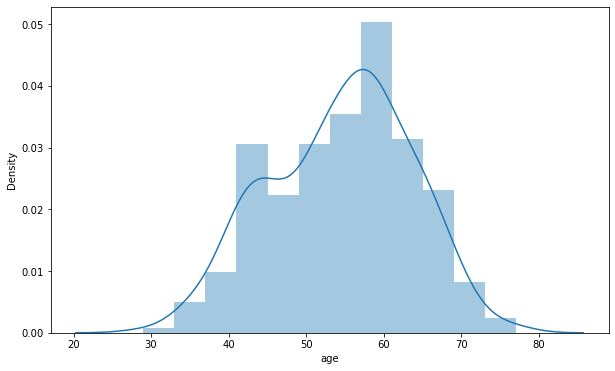

In [33]:

f,ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x)
plt.show()

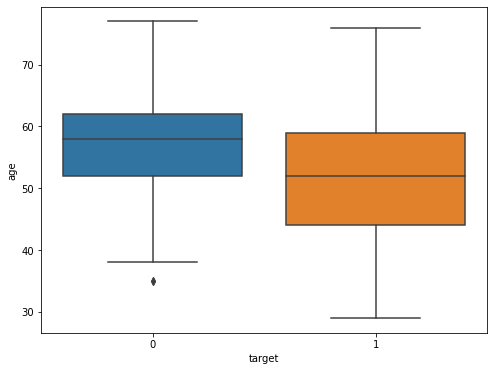

In [34]:

ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

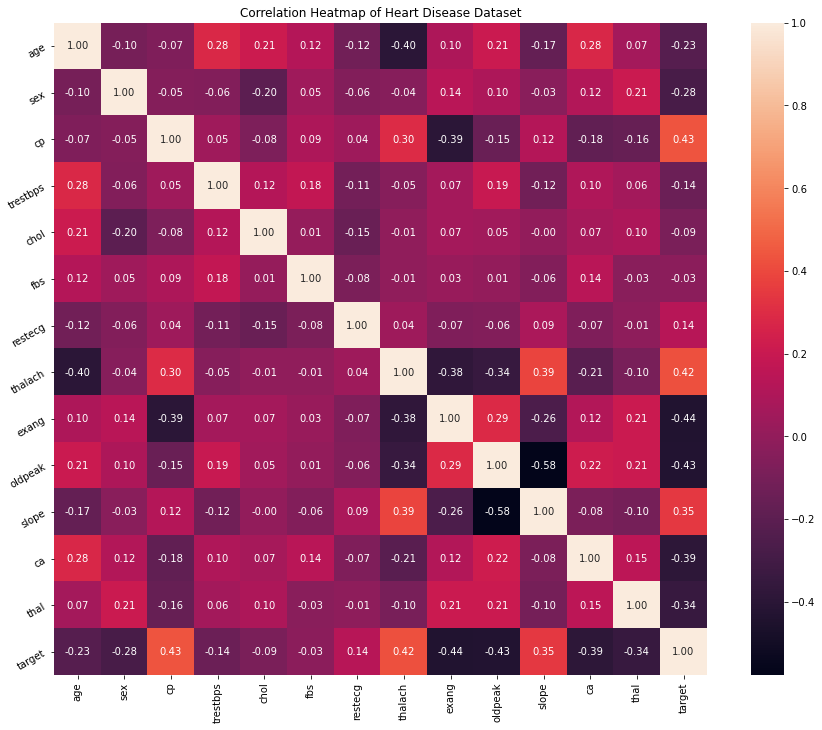

In [35]:

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

target and cp variable are mildly positively correlated (correlation coefficient = 0.43).

target and thalach variable are also mildly positively correlated (correlation coefficient = 0.42).

target and slope variable are weakly positively correlated (correlation coefficient = 0.35).

target and exang variable are mildly negatively correlated (correlation coefficient = -0.44).

target and oldpeak variable are also mildly negatively correlated (correlation coefficient = -0.43).

target and ca variable are weakly negatively correlated (correlation coefficient = -0.39).

target and thal variable are also waekly negatively correlated (correlation coefficient = -0.34).


In [36]:
####Analysis of age and other varibles
df["age"].nunique()

41

In [37]:
df["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Mean age is 54, min age is 29yrs, max age is 77.

Plot the distribution of age

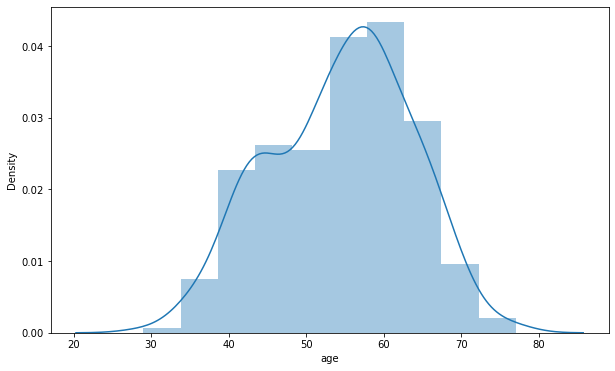

In [38]:
fx,ax= plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

Age distribution is approximately normal

visualising age with respect to target

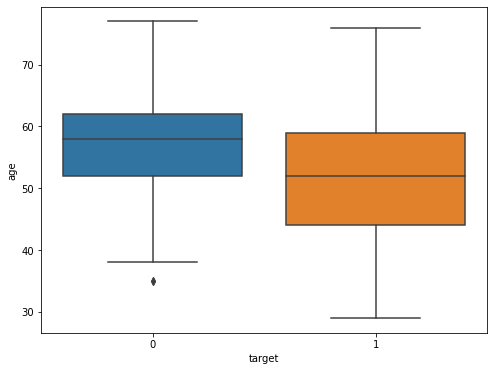

In [39]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x="target",y="age",data=df)
plt.show()            

###The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.

The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of 
the people who do not have heart disease.


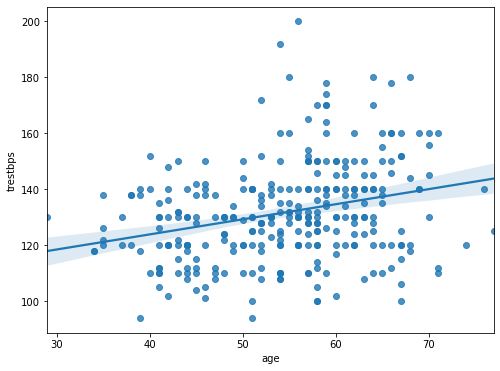

In [41]:
f,ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

##there is no co relation between age and trestbps, and above plot shows that linear model will be a fit.

###lets analyse age and chol variable 

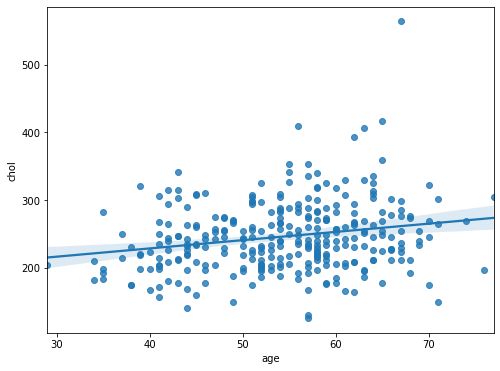

In [42]:
f,ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

###This shows there is slightly positive relation between age and chol.

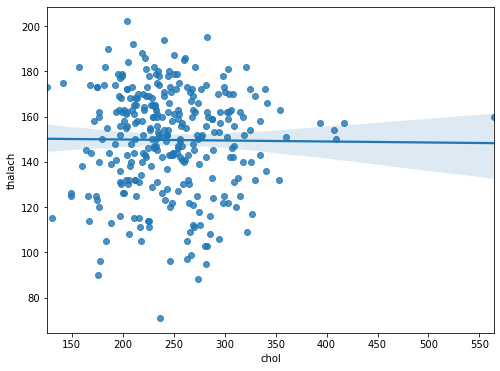

In [43]:
f,ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

In [ ]:
###There is no co relation between chol and thalach.

In [4]:
### applying logistic regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

 splitting the features and target


In [7]:
X=df.drop(columns='target',axis=1)
Y=df["target"]

In [8]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [9]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [10]:
## splitting the data into training data and test data

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


#### Model Training

In [14]:
model=LogisticRegression()

### Training the Logistic regression model with training data

In [15]:
model.fit(X_train,Y_train)

LogisticRegression()

### Model Evaluation and accuracy score


In [16]:
### accuracy on training data

In [17]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [19]:
print(training_data_accuracy)

0.8512396694214877


 Accuracy on training data is 85%

In [20]:
### accuracy on test data

X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.819672131147541


Accuracy score on test data is 81%

 Building a Predictive model

In [21]:
input_data=(52,1,2,172,199,1,1,162,0,0.5,2,0,3)
input_data_as_numpy_array=np.asarray(input_data)  ####change the input data into numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) ### reshape the numpy array as we are predicting only for one instance 
prediction=model.predict(input_data_reshaped)

In [22]:
print(prediction)

[1]


In [23]:
### prediction comes out to be correct for the selected data
###now lets predict for other data

In [24]:
input_data=(55,1,0,140,217,0,1,111,1,5.6,0,0,3)
input_data_as_numpy_array=np.asarray(input_data)  ####change the input data into numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) ### reshape the numpy array as we are predicting only for one instance 
prediction=model.predict(input_data_reshaped)

In [25]:
print(prediction)

[0]


In [ ]:
### this prediction is also correct for the selected data